In [1]:
import pandas as pd

data = pd.read_csv(r"C:\Users\SSSD\Downloads\ecommerce_dataset_updated.csv")

print(data.head)

<bound method NDFrame.head of        User_ID  Product_ID        Category  Price (Rs.)  Discount (%)  \
0     337c166f  f414122f-e          Sports        36.53            15   
1     d38a19bf  fde50f9c-5        Clothing       232.79            20   
2     d7f5f0b0  0d96fc90-3          Sports       317.02            25   
3     395d4994  964fc44b-d            Toys       173.19            25   
4     a83c145c  d70e2fc6-e          Beauty       244.80            20   
...        ...         ...             ...          ...           ...   
3655  67abda0a  28714133-6          Beauty       486.79             0   
3656  34ebc1a0  08838c2c-9            Toys       212.87            15   
3657  1defd3b1  c39a4f16-6  Home & Kitchen       389.76             0   
3658  0611293d  b4f67f96-9     Electronics       447.66            30   
3659  e73ad07c  a5d07442-d  Home & Kitchen       235.77            30   

      Final_Price(Rs.)    Payment_Method Purchase_Date  
0                31.05       Net Ban

In [2]:
print(data.isnull().sum())

User_ID             0
Product_ID          0
Category            0
Price (Rs.)         0
Discount (%)        0
Final_Price(Rs.)    0
Payment_Method      0
Purchase_Date       0
dtype: int64


In [5]:
data = data.drop_duplicates()

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3660 entries, 0 to 3659
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           3660 non-null   object 
 1   Product_ID        3660 non-null   object 
 2   Category          3660 non-null   object 
 3   Price (Rs.)       3660 non-null   float64
 4   Discount (%)      3660 non-null   int64  
 5   Final_Price(Rs.)  3660 non-null   float64
 6   Payment_Method    3660 non-null   object 
 7   Purchase_Date     3660 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 185.9+ KB


In [7]:
data['Purchase_Data'] = pd.to_datetime(data['Purchase_Date'])

In [8]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3660 entries, 0 to 3659
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   User_ID           3660 non-null   object        
 1   Product_ID        3660 non-null   object        
 2   Category          3660 non-null   object        
 3   Price (Rs.)       3660 non-null   float64       
 4   Discount (%)      3660 non-null   int64         
 5   Final_Price(Rs.)  3660 non-null   float64       
 6   Payment_Method    3660 non-null   object        
 7   Purchase_Date     3660 non-null   object        
 8   Purchase_Data     3660 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 214.5+ KB
None


In [9]:
duplicates = data[data.duplicated()]
print(f"number of dupliates: {len(duplicates)}")

number of dupliates: 0


# Calculate the total revenue by summing the Final_Price(Rs.) per Category.

In [11]:
sales_by_category = data.groupby('Category')['Final_Price(Rs.)'].sum()

sales_by_category = sales_by_category.sort_values (ascending=False)
print(sales_by_category)

Category
Clothing          115314.84
Books             111149.35
Home & Kitchen    110328.08
Sports            108518.79
Toys              107289.69
Beauty            104215.10
Electronics       100462.23
Name: Final_Price(Rs.), dtype: float64


# Top 5 Products by Sales:

In [14]:
sales_by_product = data.groupby('Category')['Final_Price(Rs.)'].sum()

sales_by_product = sales_by_product.sort_values (ascending=False).head(5)
print(sales_by_product)

Category
Clothing          115314.84
Books             111149.35
Home & Kitchen    110328.08
Sports            108518.79
Toys              107289.69
Name: Final_Price(Rs.), dtype: float64


# Analyze how the discount affects the final price.

In [15]:
avg_discount_price = data.groupby('Category').agg({'Discount (%)': 'mean', 'Final_Price(Rs.)' : 'mean'})
print(avg_discount_price)

                Discount (%)  Final_Price(Rs.)
Category                                      
Beauty             18.475248        206.366535
Books              19.035581        208.144850
Clothing           17.919021        217.165424
Electronics        19.267068        201.731386
Home & Kitchen     19.608379        200.961894
Sports             19.326923        208.689981
Toys               18.126195        205.142811


# Understand the preferred payment methods used by customers

In [16]:
payment_method_distribution = data['Payment_Method'].value_counts()

print(payment_method_distribution)


Credit Card         760
UPI                 757
Debit Card          731
Net Banking         716
Cash on Delivery    696
Name: Payment_Method, dtype: int64


# Analyze how sales trend over time (e.g., by month).

In [20]:
data['YearMonth'] = data['Purchase_Date'].dt.to_period('M')
print(data.head())
monthly_sales = data.groupby('YearMonth')['Final_Price(Rs.)'].sum()

    User_ID  Product_ID  Category  Price (Rs.)  Discount (%)  \
0  337c166f  f414122f-e    Sports        36.53            15   
1  d38a19bf  fde50f9c-5  Clothing       232.79            20   
2  d7f5f0b0  0d96fc90-3    Sports       317.02            25   
3  395d4994  964fc44b-d      Toys       173.19            25   
4  a83c145c  d70e2fc6-e    Beauty       244.80            20   

   Final_Price(Rs.) Payment_Method Purchase_Date Purchase_Data YearMonth  
0             31.05    Net Banking    2024-12-11    2024-12-11   2024-12  
1            186.23    Net Banking    2024-09-02    2024-09-02   2024-09  
2            237.76    Credit Card    2024-01-09    2024-01-09   2024-01  
3            129.89            UPI    2024-01-04    2024-01-04   2024-01  
4            195.84    Net Banking    2024-09-27    2024-09-27   2024-09  


<function matplotlib.pyplot.show(close=None, block=None)>

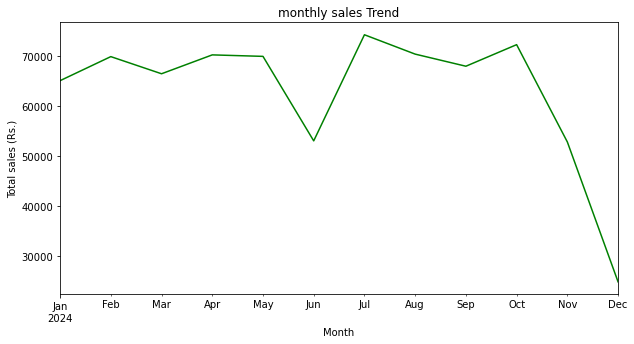

In [26]:
import matplotlib.pyplot as plt

monthly_sales.plot(kind='line', figsize=(10,5), color='green')
plt.title('monthly sales Trend')
plt.xlabel('Month')
plt.ylabel('Total sales (Rs.)')
plt.show

# Visualize Data
### Bar Chart: Revenue by Category

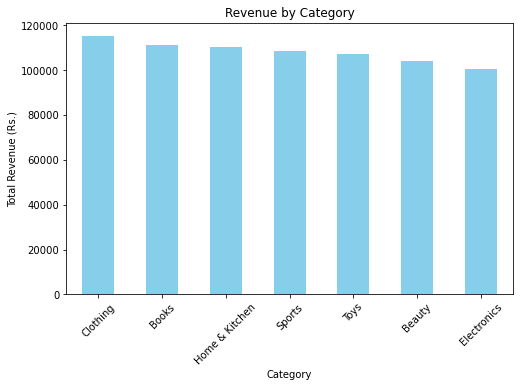

In [28]:
sales_by_category.plot(kind='bar', figsize=(8, 5), color='skyblue')
plt.title('Revenue by Category')
plt.xlabel('Category')
plt.ylabel('Total Revenue (Rs.)')
plt.xticks(rotation=45)
plt.show()


# Histogram: Discount Distribution

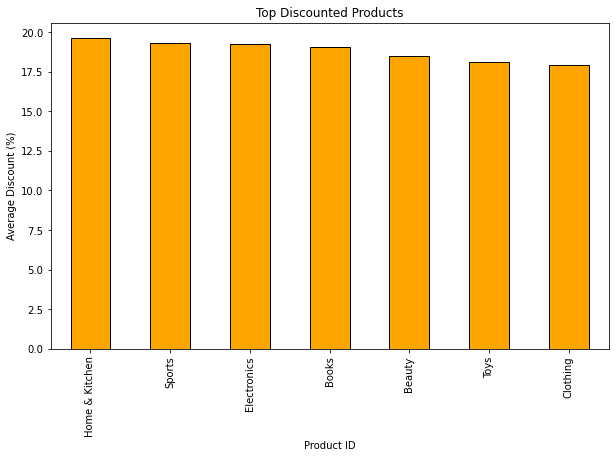

In [34]:
avg_discount_per_product = data.groupby('Category')['Discount (%)'].mean().sort_values(ascending=False)

# Plot the top discounted products
avg_discount_per_product.head(20).plot(kind='bar', figsize=(10, 6), color='orange', edgecolor='black')
plt.title('Top Discounted Products')
plt.xlabel('Product ID')
plt.ylabel('Average Discount (%)')
plt.xticks(rotation=90)
plt.show()

In [37]:
# Export the cleaned data to a new CSV file
data.to_csv('cleaned_customer_data.csv', index=False)

# Confirm that the file has been saved
print("Data has been exported successfully to 'cleaned_customer_data.csv'.")


Data has been exported successfully to 'cleaned_customer_data.csv'.


# we can use Python libraries like Plotly and Dash to create interactive dashboards directly in your notebook or as a web app. Here's how you can do it step by step:

# Install Required Libraries

In [35]:
pip install plotly dash pandas


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Set Up the Basic Dashboard with Dash
### Here's an example of how you can create a simple interactive dashboard using Dash:

# Running the Dashboard
After running the script, your dashboard will be available at http://127.0.0.1:8050/ (or a similar URL) in your web browser.
You can interact with the charts by hovering, zooming, and even filtering based on your data.

In [38]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.express as px
import pandas as pd

# Load your cleaned dataset
data = pd.read_csv('cleaned_customer_data.csv')

# Initialize Dash app
app = dash.Dash(__name__)

# Create a plotly chart (e.g., total sales by category)
sales_by_category = data.groupby('Category')['Final_Price(Rs.)'].sum().reset_index()
fig_category = px.bar(sales_by_category, x='Category', y='Final_Price(Rs.)', title='Sales by Category')

# Layout of the dashboard
app.layout = html.Div([
    html.H1("Customer Transaction Dashboard"),
    
    # Chart 1: Sales by Category
    html.Div([
        html.H3("Sales by Category"),
        dcc.Graph(figure=fig_category)
    ]),

    # Chart 2: Discount Distribution (Histogram)
    html.Div([
        html.H3("Discount Distribution"),
        dcc.Graph(
            figure=px.histogram(data, x='Discount (%)', nbins=20, title='Discount Distribution')
        )
    ]),

    # Chart 3: Monthly Sales Trend
    html.Div([
        html.H3("Monthly Sales Trend"),
        dcc.Graph(
            figure=px.line(data, x='Purchase_Date', y='Final_Price(Rs.)', title='Monthly Sales Trend')
        )
    ])
])

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)
